In [1]:
import numpy as np
import torch
import torchvision
from torchvision.datasets import MNIST
from torchvision.datasets import FashionMNIST
import sklearn
import matplotlib.pyplot as plt
import sklearn
import sklearn.decomposition
import sklearn.tree
import cv2 as cv
import os

In [2]:
train_data = MNIST(root='./data',
                   train=True,
                   download=True,
                   transform=torchvision.transforms.ToTensor())

test_data = MNIST(root='./data',
                   train=False,
                   download=True,
                   transform=torchvision.transforms.ToTensor())

train_X, train_Y = train_data.data.numpy(), train_data.targets.numpy()
test_X, test_Y = test_data.data.numpy(), test_data.targets.numpy()

In [3]:
train_X_r = train_X.reshape(60000, 28,28)
test_X_r = test_X.reshape(10000, 28,28)

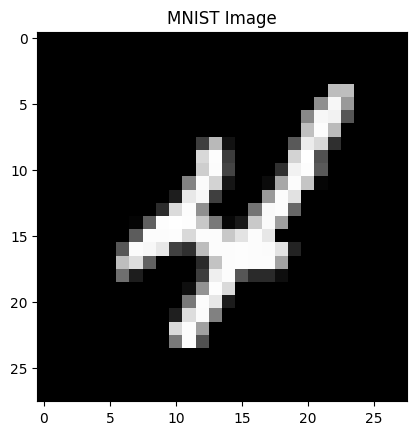

In [4]:
plt.imshow(train_X[9], cmap='gray')
plt.title('MNIST Image')
plt.show()

In [5]:
train_X_cd = np.array([cv.cornerHarris(x,2,3,0.04) for x in train_X])
test_X_cd = np.array([cv.cornerHarris(x,2,3,0.04) for x in test_X])

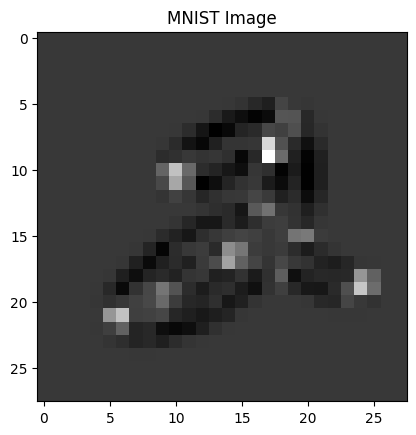

In [20]:
plt.imshow(train_X_cd[5].reshape((28,28)), cmap='gray')
plt.title('MNIST Image')
plt.show()

In [7]:
n_components = 10
train_PCA = sklearn.decomposition.PCA(n_components)
train_X_pc = train_PCA.fit_transform(train_X_r.reshape((60000,28*28)))
test_X_pc = sklearn.decomposition.PCA(n_components).fit_transform(test_X_r.reshape((10000,28*28)))

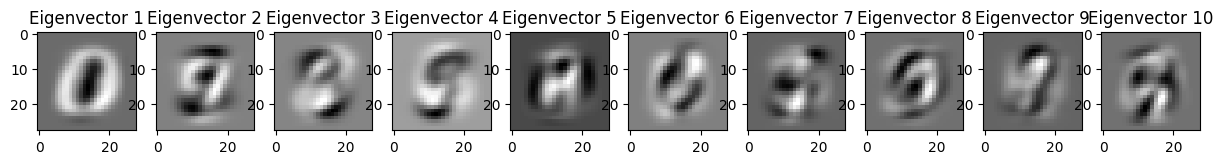

In [8]:
eigenimages = train_PCA.components_.reshape((n_components, 28, 28))

# Plot the eigenimages
plt.figure(figsize=(15, 3))
for i in range(n_components):
    plt.subplot(1, n_components, i + 1)
    plt.imshow(eigenimages[i], cmap='gray')
    plt.title(f'Eigenvector {i + 1}')


In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(train_X_pc.reshape(60000,n_components),train_Y)
rf_clf.score(test_X_pc.reshape(10000,n_components),test_Y)

0.134

In [10]:
import sklearn.tree
dt_clf_pc = sklearn.tree.DecisionTreeClassifier()
dt_clf_pc.fit(train_X_pc.reshape(60000,n_components),train_Y)
dt_clf_pc.score(test_X_pc.reshape(10000,n_components),test_Y)

0.1294

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7161343f92d0>>
Traceback (most recent call last):
  File "/home/sean/sync/school/uni/w24/cv/project/venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


KeyboardInterrupt: 

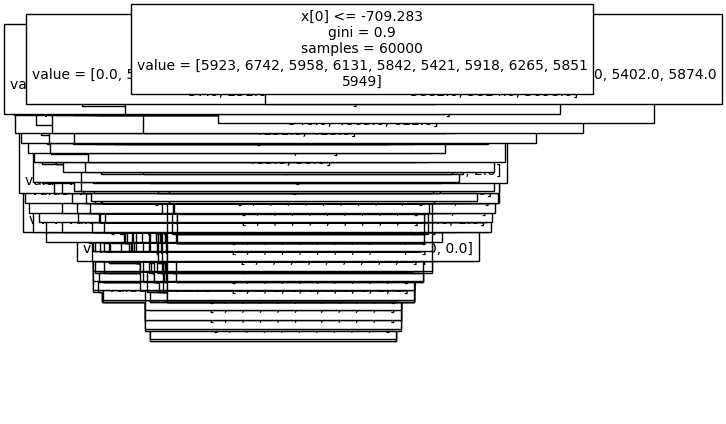

In [13]:
sklearn.tree.plot_tree(dt_clf_pc)
plt.show()

In [16]:
import graphviz
dot_data = sklearn.tree.export_graphviz(dt_clf_pc, out_file=None, filled=True)
graph = graphviz.Source(dot_data, format="png")
graph.render("decision_tree_graphivz")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0427813 to fit


'decision_tree_graphivz.png'